# Titanic - Survival Prediction


<img src=https://www.revell.de/out/pictures/generated/product/4/540_540_88/05804_i_rms_titanic.jpg>

## 1 - Introduccion
---


El naufragio del RMS Titanic se destaca como uno de los más célebres en la historia marítima. En la fecha del 15 de abril de 1912, durante su primer viaje, el Titanic se sumergió tras colisionar con un iceberg, resultando en la pérdida de 1502 vidas de los 2224 pasajeros y tripulantes a bordo. Este impactante desastre conmocionó a nivel internacional, dando lugar a la implementación de normativas de seguridad más rigurosas para embarcaciones.

La escasez de botes salvavidas para los ocupantes contribuyó significativamente a la alta mortalidad en el naufragio. Aunque la supervivencia ante el hundimiento tuvo su cuota de suerte, ciertos grupos, como mujeres, niños y la élite social, presentaban mayores posibilidades de sobrevivir.

En este desafío, se nos encomienda concluir el análisis sobre qué categorías de personas tenían más chances de sobrevivir. Específicamente, se nos insta a emplear herramientas de aprendizaje automático para prever qué pasajeros lograron sobrevivir a esta trágica experiencia.

## 2 - Carga de Data
---


In [3]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics 

#sns.set(style='whitegrid', context='notebook')

#biblioteca para balancear los datos utilizando over_sampling
from imblearn.over_sampling import SMOTE

#biblioteca para crear el modelo de machine learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier

#Validation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [4]:
#Ubicarme en la rais para poder utilizar todas las carpetas

from sys import path
import os

path.append(os.path.realpath('../'))


Descarguemos los datos y veamos cómo se ven.

In [5]:
train_df = pd.read_csv('../../datasets/Titanic_train.csv')
test_df = pd.read_csv('../../datasets/Titanic_test.csv')

train_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
315,316,1,3,"Nilsson, Miss. Helmina Josefina",female,26.0,0,0,347470,7.8542,NaN,S
603,604,0,3,"Torber, Mr. Ernst William",male,44.0,0,0,364511,8.0500,NaN,S
748,749,0,1,"Marvin, Mr. Daniel Warner",male,19.0,1,0,113773,53.1000,D30,S


In [6]:
test_df.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
232,1124,3,"Wiklund, Mr. Karl Johan",male,21.0,1,0,3101266,6.4958,NaN,S
124,1016,3,"Kennedy, Mr. John",male,NaN,0,0,368783,7.7500,NaN,Q
317,1209,2,"Rogers, Mr. Reginald Harry",male,19.0,0,0,28004,10.5000,NaN,S
333,1225,3,"Nakid, Mrs. Said (Waika Mary"" Mowad)""",female,19.0,1,1,2653,15.7417,NaN,C
288,1180,3,"Mardirosian, Mr. Sarkis",male,NaN,0,0,2655,7.2292,F E46,C


### 2.1 - Informacion de los Datos



Cantidad de Filas y col

In [7]:
print(f'Train has {train_df.shape[0]} rows and {train_df.shape[1]} columns')
print(f'Test has {test_df.shape[0]} rows and {test_df.shape[1]} columns')

Train has 891 rows and 12 columns
Test has 418 rows and 11 columns


Duplicados

In [8]:
print(f'Train has {train_df.duplicated().sum()} duplicated rows')
print(f'Test has {test_df.duplicated().sum()} duplicated rows')

Train has 0 duplicated rows
Test has 0 duplicated rows


Diccionario del DataFrame

| Nombre de la Columna | Significado |
|----------------------|-------------|
| PassengerId          | Índice único para filas de pasajeros |
| Survived             | Si el pasajero sobrevivió o no (1 - sí, 0 - no) |
| Pclass               | Clase del boleto (1 - 1ra, 2 - 2da, 3 - 3ra) |
| Name                 | Nombre del pasajero |
| Sex                  | Género del pasajero |
| Age                  | Edad del pasajero |
| SibSp                | Número de hermanos/cónyuges a bordo |
| Parch                | Número de padres/hijos a bordo |
| Ticket               | Número del boleto del pasajero |
| Fare                 | Indicación de la tarifa pagada |
| Cabin                | Número de cabina del pasajero |
| Embarked             | El puerto en el que un pasajero embarcó (C - Cherbourg, S - Southampton, Q - Queenstown) |


La primera columna es el ID del pasajero. 
El ID de un pasajero es simplemente un número para identificar a ese pasajero en este conjunto de datos. Por lo tanto, esta columna no es realmente una parte de la información que deberíamos tener en cuenta. Podemos eliminar esta columna o utilizarla como índice para este conjunto de datos.

In [9]:
#INDICE / id: passengerID

train_df.set_index('PassengerId', inplace=True)
test_df.set_index('PassengerId', inplace=True)


# PROCEDO A ELIMINAR LA COLUMNA
#train_df.drop('PassengerId', axis=1, inplace=True) 
#test_df.drop('PassengerId', axis=1, inplace=True)

La columna nombre no me da informacion relevante: Drop

In [10]:
# Eliminar la columna 'Name'
train_df.drop('Name', axis=1, inplace=True) 
test_df.drop('Name', axis=1, inplace=True)

Ticket:Drop


In [11]:
# Eliminar la columna 'Cabin'
train_df.drop('Ticket', axis=1, inplace=True)
test_df.drop('Ticket', axis=1, inplace=True)

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.6+ KB


In [13]:
train_df.sample(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
761,0,3,male,NaN,0,0,14.5000,NaN,S
830,1,1,female,62.0,0,0,80.0000,B28,NaN
26,1,3,female,38.0,1,5,31.3875,NaN,S


Embarked

In [14]:
train_df.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [15]:
test_df.Embarked.value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

### 2.2 - Faltantes

In [16]:
test_df.isnull().sum()

Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [17]:
train_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

## 3 - EDA
---

Analizaremos los datos crudos y luego completaremos los faltantes e imputaremos los datos donde se requiera


### 3.1 - EDA (DATOS SIN PROCESAR)

* Cuantos varones y cuantas Mujeres abordaron?


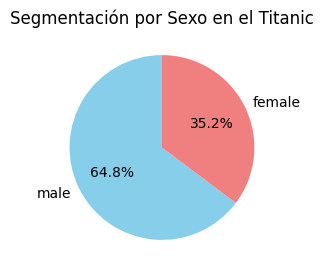

In [18]:
# Contar la cantidad de hombres y mujeres
gender_counts = train_df['Sex'].value_counts()

# Crear un gráfico de torta
plt.figure(figsize=(3, 3))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Segmentación por Sexo en el Titanic')
plt.show()

* Cuantos Hombres y mujeres sobrevivieron?

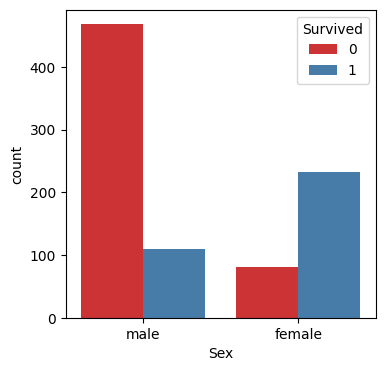

In [19]:
plt.figure(figsize=(4, 4))
sns.countplot(data=train_df,x='Sex', hue='Survived', palette='Set1');

* Otras Variables Categoricas

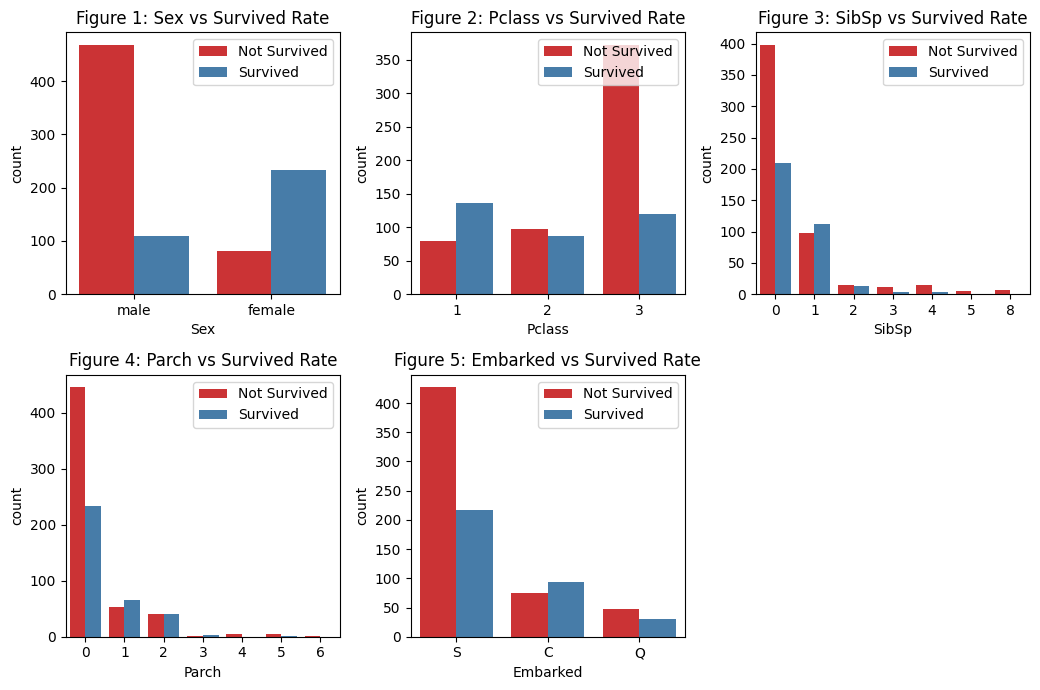

In [20]:
cols = ['Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']

n_rows = 2
n_cols = 3

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.5,n_rows*3.5))

for r in range(0,n_rows):
    for c in range(0,n_cols):  
        
        i = r*n_cols+ c       
        if i < len(cols):
            ax = axs[r][c]
            sns.countplot(train_df, x=cols[i],hue='Survived', ax=ax, palette='Set1')
            ax.set_title(f'Figure {i+1}: {cols[i]} vs Survived Rate')
            ax.legend(title='', loc='upper right', labels=['Not Survived', 'Survived'])

axs.flat[-1].set_visible(False)
plt.tight_layout()
plt.show()

* Distribucion de la Edad

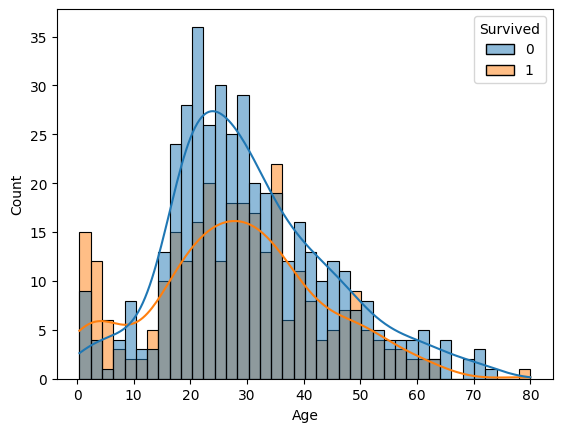

In [21]:
sns.histplot(data=train_df, x='Age', hue='Survived', bins = 40, kde=True);

* Fare (costos de viaje)

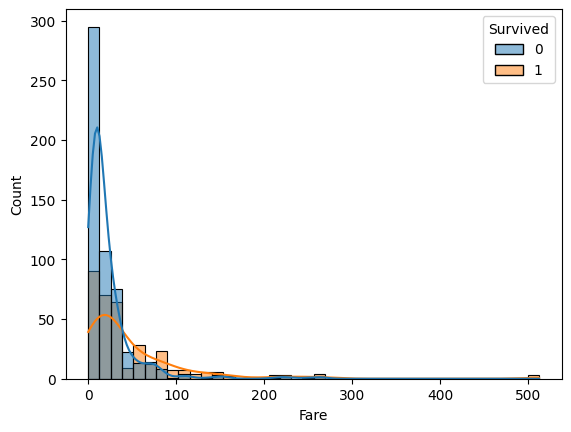

In [22]:
sns.histplot(data=train_df, x='Fare', hue='Survived', bins = 40, kde=True);

Datos continuos

In [23]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 4 - Data Preprocessing
---

In [24]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.6+ KB


### 4.1 - Datos Faltantes

In [25]:
train_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [26]:
test_df.isnull().sum()

Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64

++++++++++++++++++++++++++++++++++++++++++++++++ 

EDAD (missing Values)

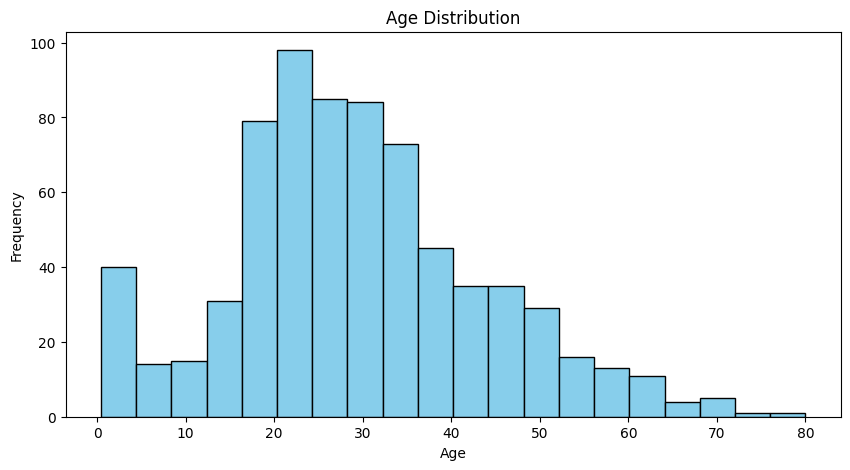

In [27]:
age_data = train_df['Age'].dropna()  # Remove NaN values for plotting

# Matplotlib Histogram
plt.figure(figsize=(10, 5))
plt.hist(age_data, bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

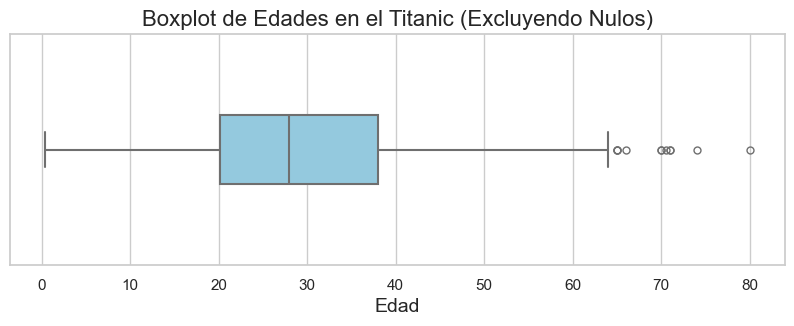

In [28]:
# Filtrar los valores nulos en la columna 'Age'
df_age_notnull = train_df.dropna(subset=['Age'])

# Establecer un estilo más elaborado de Seaborn
sns.set(style="whitegrid")

# Crear un boxplot con estilo
plt.figure(figsize=(10, 3))
sns.boxplot(x='Age', data=df_age_notnull, color='skyblue', width=0.3, fliersize=5, linewidth=1.5)
plt.title('Boxplot de Edades en el Titanic (Excluyendo Nulos)', fontsize=16)
plt.xlabel('Edad', fontsize=14)
plt.show()

In [29]:
train_df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [30]:
round(train_df['Age'].mean())

30

In [31]:
# LLENADO VALORES DE EDAD

train_df['Age'].fillna(round(train_df['Age'].mean()), inplace=True)
test_df['Age'].fillna(round(test_df['Age'].mean()), inplace=True)

Verificando nulos


In [32]:
train_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [33]:
test_df.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64

++++++++++++++++++++++++++++++++++++++++++++++++ 

Cabin (missing Values)

In [34]:
train_df.Cabin.value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [35]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,NaN,S
2,1,1,female,38.0,1,0,71.2833,C85,C
3,1,3,female,26.0,0,0,7.9250,NaN,S
4,1,1,female,35.0,1,0,53.1000,C123,S
5,0,3,male,35.0,0,0,8.0500,NaN,S


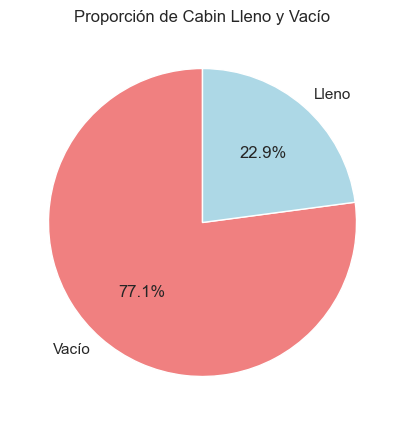

In [36]:
# Mapear los valores booleanos a 'Lleno' y 'Vacío'
cabin_status = train_df['Cabin'].notnull().map({True: 'Lleno', False: 'Vacío'})

# Contar valores 'Lleno' y 'Vacío'
cabin_status_counts = cabin_status.value_counts()

# Crear un gráfico de pastel
plt.figure(figsize=(5, 5))
plt.pie(cabin_status_counts, labels=cabin_status_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue'])
plt.title('Proporción de Cabin Lleno y Vacío')
plt.show()

Muy pocos valores para poder incidir que valores tendrian los datos vacios por lo que optare por eliminar esta columna


In [37]:
# Eliminar la columna 'Cabin'
train_df.drop('Cabin', axis=1, inplace=True)
test_df.drop('Cabin', axis=1, inplace=True)

Verificando nulos


In [38]:
train_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [39]:
test_df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

Ahora Los campos vacios son muy pocos por lo que procedere eliminar estas filas

In [40]:
# Eliminar los registros con valores nulos en 'Embarked'
train_df.dropna(subset=['Embarked'], inplace=True)

# "FARE"
test_df.dropna(subset=['Fare'], inplace=True)

Verificando nulos


In [41]:
train_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [42]:
test_df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [43]:
# Restablecer los índices / NO NECESARIO POR QUE EL PASSENGERID es el INDEX
#train_df.reset_index(inplace=True) 
#test_df.reset_index(inplace=True)

### 4.2 - Encoding categorical  Values

In [44]:
non_numeric_columns = train_df.select_dtypes(exclude=['number']).columns

# Mostrar las columnas no numéricas
print("Variables No Numéricas:")
print(non_numeric_columns)

Variables No Numéricas:
Index(['Sex', 'Embarked'], dtype='object')


* Sex

In [45]:
train_df['Sex'] = train_df['Sex'].map({'female': 0, 'male': 1})
test_df['Sex'] = test_df['Sex'].map({'female': 0, 'male': 1})

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,S
2,1,1,0,38.0,1,0,71.2833,C
3,1,3,0,26.0,0,0,7.9250,S
4,1,1,0,35.0,1,0,53.1000,S
5,0,3,1,35.0,0,0,8.0500,S


* Embarked

In [46]:
train_df.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [47]:
train_df['Embarked'] = train_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
test_df['Embarked'] = test_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,0
2,1,1,0,38.0,1,0,71.2833,1
3,1,3,0,26.0,0,0,7.9250,0
4,1,1,0,35.0,1,0,53.1000,0
5,0,3,1,35.0,0,0,8.0500,0


### 4.2 - Correlacion

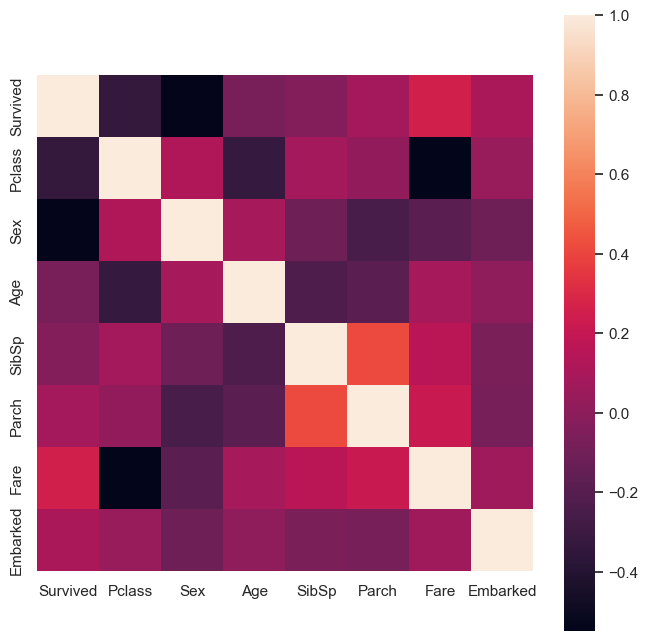

In [48]:
#correlation matrix
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corrmat, vmax= 1, square=True);

### 4.3 - Balanceo de Data

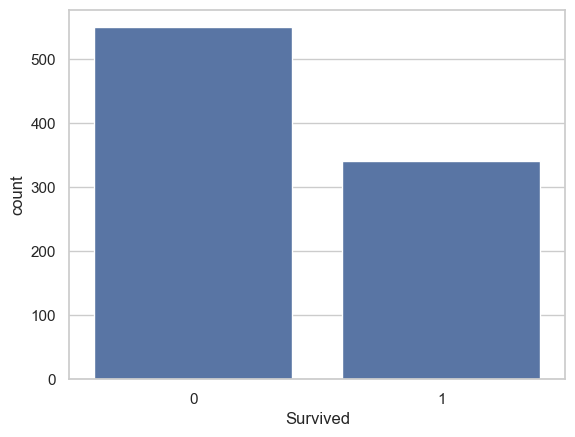

In [49]:
#variable Survived está desbalanceada

ax = sns.countplot(x='Survived', data=train_df)

In [50]:
train_df.Survived.value_counts()

Survived
0    549
1    340
Name: count, dtype: int64

In [51]:
#biblioteca para balancear los datos utilizando over_sampling
#from imblearn.over_sampling import SMOTE

#dividiendo los datos en características y target
X = train_df.drop('Survived', axis = 1)
y = train_df['Survived']

In [52]:
smt = SMOTE(random_state=123)
X, y = smt.fit_resample(X, y)

In [53]:
#unión de los datos balanceados
train_df = pd.concat([X, y], axis=1)

In [54]:
#verificación 1 - unión de los datos
train_df.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,22.0,1,0,7.2500,0,0
1,1,0,38.0,1,0,71.2833,1,1


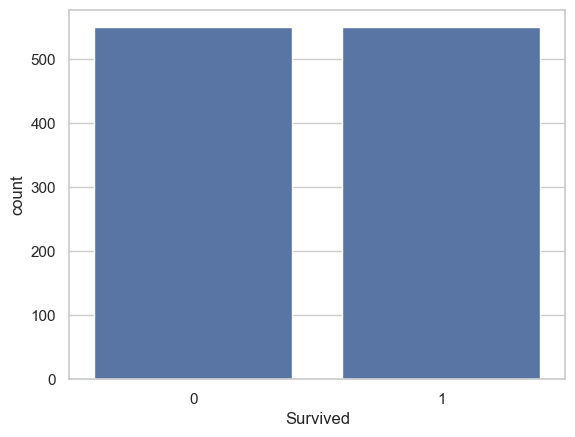

In [55]:
#verificación 2 - balanceamiento
ax = sns.countplot(x='Survived', data=train_df)

In [56]:
train_df.Survived.value_counts()

Survived
0    549
1    549
Name: count, dtype: int64

Datos Balanceados! listo

### 4.4 - Standar Scaler

In [57]:
#División en inputs y outputs
X = train_df.drop('Survived', axis = 1)
y = train_df['Survived']

#X_t = test_df.drop('Survived', axis = 1)
#y_t = test_df['Survived']

In [58]:
#biblioteca para padronizar los datos
#from sklearn.preprocessing import StandardScaler

norm = StandardScaler()
X_normalizado = norm.fit_transform(X)
X_normalizado

array([[ 0.89647737,  0.89277881, -0.5720873 , ..., -0.46397809,
        -0.53029173, -0.56013491],
       [-1.43606328, -1.12009826,  0.64785705, ..., -0.46397809,
         0.68892265,  1.0088144 ],
       [ 0.89647737, -1.12009826, -0.26710121, ..., -0.46397809,
        -0.51743951, -0.56013491],
       ...,
       [-1.43606328,  0.89277881, -0.04207475, ..., -0.46397809,
        -0.09379657, -0.56013491],
       [-0.26979295, -1.12009826, -1.09287981, ..., -0.46397809,
        -0.44865938,  1.0088144 ],
       [ 0.89647737,  0.89277881, -0.22824643, ..., -0.46397809,
        -0.53179282, -0.56013491]])

## 5 - Modeling
---

In [59]:
#biblioteca para división de los datos
#from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_normalizado, y, test_size=0.3, random_state=123)

### 5.1 - KNN


In [60]:
#biblioteca para crear el modelo de machine learning
#from sklearn.neighbors import KNeighborsClassifier

In [61]:
#iniciar el modelo (creamos el modelo) - por default son 5 vecinos
knn = KNeighborsClassifier(metric='euclidean')

In [62]:
#entrenando el modelo con los datos de entrenamiento
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [63]:
#probando el modelo con los datos de prueba
prediccion_knn = knn.predict(X_test)

In [64]:
prediccion_knn

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,

### 5.2 - Bayes

In [65]:
#biblioteca para crear el modelo de machine learning
#from sklearn.naive_bayes import BernoulliNB

In [66]:
#escojo utilizar mediana, porque es el valor central de nuestros datos ordenados
mediana = np.median(X_train)
mediana

-0.4639780948730003

In [67]:
#Binarizando los recursos usando la mediana
X_train_binarizado = np.where(X_train > mediana, 1, 0)

In [68]:
X_train_binarizado

array([[1, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 1, 0],
       [1, 1, 0, ..., 0, 1, 0],
       ...,
       [0, 1, 0, ..., 1, 1, 1],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 1]])

In [69]:
y_train

79      0
776     1
733     0
705     1
995     1
       ..
638     0
113     0
96      1
106     1
1041    1
Name: Survived, Length: 768, dtype: int64

In [70]:
#creamos el modelo
bnb = BernoulliNB()

In [71]:
#entrenando el modelo
bnb.fit(X_train_binarizado, y_train)

BernoulliNB()

In [72]:
#Binarizando la base de prueba
X_test_binarizado = np.where(X_test > np.median(X_test), 1, 0)

In [73]:
#probando el modelo
prediccion_BNb = bnb.predict(X_test_binarizado)

In [74]:
prediccion_BNb

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,

### 5.3 - Desicion Tree

In [75]:
#biblioteca para crear el modelo de machine learning
#from sklearn.tree import DecisionTreeClassifier

In [76]:
#iniciando el modelo
dtc = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [77]:
#entrenando el modelo
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [78]:
#verificando la importancia de cada atributo
dtc.feature_importances_

array([0.0895277 , 0.30229981, 0.25499217, 0.03204793, 0.01722124,
       0.29066752, 0.01324363])

In [79]:
prediccion_ArbolDecision = dtc.predict(X_test)

In [80]:
prediccion_ArbolDecision

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,

## 6 - Validacion de Modelos
---

### 6.1 - Matriz de Confusion

![image.png](https://raw.githubusercontent.com/ElProfeAlejo/machine_learning_clasificacion/main/imagen_5_1.png)

In [81]:
#from sklearn.metrics import confusion_matrix

In [82]:
print(confusion_matrix(y_test, prediccion_knn))

[[140  20]
 [ 46 124]]


In [83]:
print(confusion_matrix(y_test, prediccion_BNb))

[[132  28]
 [ 61 109]]


In [84]:
print(confusion_matrix(y_test, prediccion_ArbolDecision))

[[134  26]
 [ 40 130]]


### 6.2 - Accuracy

In [85]:
#modelo KNN
print(accuracy_score(y_test, prediccion_knn))

0.8


In [86]:
#modelo Bernoulli de Naive Bayes
print(accuracy_score(y_test, prediccion_BNb))

0.7303030303030303


In [87]:
#modelo Arbol de Decisión
print(accuracy_score(y_test, prediccion_ArbolDecision))

0.8


### 6.3 - Precision

In [88]:
#from sklearn.metrics import precision_score

In [89]:
#modelo KNN
print(precision_score(y_test, prediccion_knn))

0.8611111111111112


In [90]:
#modelo Bernoulli de Naive Bayes
print(precision_score(y_test, prediccion_BNb))

0.7956204379562044


In [91]:
#modelo Arbol de Decisión
print(precision_score(y_test, prediccion_ArbolDecision))

0.8333333333333334


### 6.4 - Recall

In [92]:
#from sklearn.metrics import recall_score

In [93]:
#modelo KNN
print(recall_score(y_test, prediccion_knn))

0.7294117647058823


In [94]:
#modelo Bernoulli de Naive Bayes
print(recall_score(y_test, prediccion_BNb))

0.6411764705882353


In [95]:
#modelo Arbol de Decisión
print(recall_score(y_test, prediccion_ArbolDecision))

0.7647058823529411


### 6.5 - The Best Model

In [96]:
#Ejemplo - análisis de las precisiones previamente calculadas
print('Modelo KNN: ', precision_score(y_test, prediccion_knn))
print('Modelo Bernoulli de Naive Bayes: ', precision_score(y_test, prediccion_BNb))
print('Modelo Arbol de Decisión: ', precision_score(y_test, prediccion_ArbolDecision))

Modelo KNN:  0.8611111111111112
Modelo Bernoulli de Naive Bayes:  0.7956204379562044
Modelo Arbol de Decisión:  0.8333333333333334


EL modelo que mas precision nos ofrece para nuestra prueba es el KNN

## 7 - Probando el Modelo
---

In [97]:
train_df.head(4)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,22.0,1,0,7.2500,0,0
1,1,0,38.0,1,0,71.2833,1,1
2,3,0,26.0,0,0,7.9250,0,1
3,1,0,35.0,1,0,53.1000,0,1


In [98]:
# DATOS A VALIDAR

Xval = [[1,0,38,1,0,71,1]]

Xval_normalizado = norm.transform(pd.DataFrame(Xval, columns = X.columns))
Xval_normalizado

array([[-1.43606328, -1.12009826,  0.64785705,  0.50408008, -0.46397809,
         0.68352853,  1.0088144 ]])

In [99]:
#Probando el mejor modelo KNN
prediccion_Xval = knn.predict(Xval_normalizado)
diccionario = {'Si': 1, 'No': 0}

clave_encontrada = next((clave for clave, valor in diccionario.items() if valor == prediccion_Xval[0]), None)
print(f"La probabilidad de que el pasajero Sobreviva es : {clave_encontrada}")

La probabilidad de que el pasajero Sobreviva es : Si


## 8 - Guardar el Modelo
---

In [101]:
# Guardamos en disco duro nuestro modelo 
import pickle 

# Allacenamiento del modelo en disco duro 
Archivo = "Titanic_Knn_Predict_Survival.pkl"
with open(Archivo, 'wb') as file:
  pickle.dump(knn, file)